In [27]:
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
from sklearn.preprocessing import StandardScaler
import joblib

In [14]:
df=pd.read_csv(r"C:\Users\user\OneDrive\Desktop\house_prediction\clean_listings.csv")
df.head()

,Unnamed: 0,location,property_type,bedrooms,bathrooms,size_sqm,amenities,price_kes,listing_date,size_sqft,...,balcony,cctv,elevator,garden,gym,parking,security,servant quarter,swimming pool,month
0,0,Ruaka,Penthouse,5,4,234.0,"cctv,servant quarter",20876564.0,2025-02-15,2518.75260,...,0,1,0,0,0,0,0,1,0,February
1,1,South B,Penthouse,2,2,122.6,"servant quarter,gym,swimming pool,elevator",11431043.0,2025-09-16,1319.65414,...,0,0,1,0,1,0,0,1,1,September
2,2,Kasarani,Penthouse,3,4,52.7,"cctv,swimming pool,balcony",9893180.0,2026-01-13,567.25753,...,1,1,0,0,0,0,0,0,1,January
3,3,Ruaka,Bungalow,3,3,99.6,"gym,servant quarter,elevator,security,garden",15415773.0,2025-10-07,1072.08444,...,0,0,1,1,1,0,1,1,0,October
4,4,Kileleshwa,Bungalow,3,2,50.1,"garden,servant quarter,elevator",13150006.0,2026-02-04,539.27139,...,0,0,1,1,0,0,0,1,0,February


In [15]:
# most expensive loations
df.groupby("location")["price_kes"].mean().sort_values(ascending=False).head()

location
Runda         3.982771e+07
Karen         3.457573e+07
Lavington     2.177254e+07
Westlands     2.018511e+07
Kileleshwa    1.848147e+07
Name: price_kes, dtype: float64

In [16]:
# correlation between price and size
df[["price_kes","size_sqft"]].corr()

,price_kes,size_sqft
price_kes,1.000000,0.377953
size_sqft,0.377953,1.000000


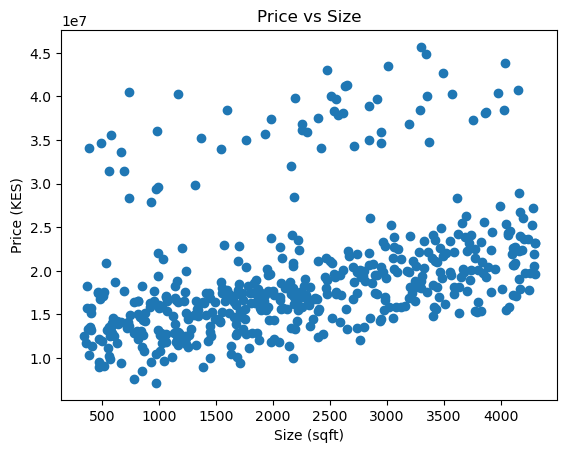

In [17]:
plt.figure()
plt.scatter(df["size_sqft"], df["price_kes"])
plt.xlabel("Size (sqft)")
plt.ylabel("Price (KES)")
plt.title("Price vs Size")
plt.show()

In [18]:
amenity_cols = [
    "balcony", "cctv", "elevator", "garden",
    "gym", "parking", "security",
    "servant quarter", "swimming pool"
]

amenity_impact = {}

for col in amenity_cols:
    mean_price = df.groupby(col)["price_kes"].mean()
    if 1 in mean_price.index:
        amenity_impact[col] = mean_price[1]

sorted(amenity_impact.items(), key=lambda x: x[1], reverse=True)

[('parking', np.float64(19930541.145454545)),
 ('balcony', np.float64(19864108.455621302)),
 ('gym', np.float64(19667268.965714287)),
 ('servant quarter', np.float64(19606415.848958332)),
 ('cctv', np.float64(19551730.45614035)),
 ('swimming pool', np.float64(19480094.02366864)),
 ('elevator', np.float64(19011552.23391813)),
 ('garden', np.float64(18952293.98275862)),
 ('security', np.float64(18403154.21637427))]

In [19]:
X = df[[
    "size_sqft",
    "bedrooms",
    "bathrooms"
    
]]

y = df["price_kes"]

In [20]:
# split into features and target variable

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [21]:
# train the model
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [22]:
y_pred=model.predict(X_test)

In [25]:
y_pred

array([16173904.82992047, 14736562.70753033, 15816803.56129942,
       13668472.61291528, 24955119.59494967, 13951751.86229005,
       26168316.63824753, 21315896.99319855, 24881701.34614772,
       23141887.87799605, 18957571.8529361 , 22187532.14026789,
       17476362.08166194, 26565327.01031766, 16758400.13118371,
       19258485.31757541, 20433128.77215608, 15027185.88138699,
       22710997.5605754 , 15777674.53433904, 21057803.75600725,
       27566802.58467132, 18869023.50823268, 15495344.75739665,
       24037925.72656861, 21279275.31979278, 21646901.25369712,
       23111289.85664212, 20309819.22241827, 21147974.96038986,
       17941779.22961634, 16818786.36114775, 13281888.95712482,
       18536597.7921089 , 15723721.23291789, 20915438.5353797 ,
       16568037.04843833, 20000680.5736132 , 22410659.53417927,
       18724287.35954754, 19886711.84222566, 15730252.1104644 ,
       21843121.82674221, 23988034.42563275, 24964766.23474063,
       16081261.5142851 , 22807094.46800

In [23]:
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("MAE:", mae)
print("RMSE:", rmse)
print("R2:", r2)

MAE: 3981110.919199643
RMSE: 6096132.725164611
R2: 0.2516078010924512


In [24]:
# random forest
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=50, random_state=42)
rf_model.fit(X_train, y_train)
rf_y_pred = rf_model.predict(X_test)
rf_mae = mean_absolute_error(y_test, rf_y_pred)
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_y_pred))
rf_r2 = r2_score(y_test, rf_y_pred)
print("Random Forest MAE:", rf_mae)
print("Random Forest RMSE:", rf_rmse)
print("Random Forest R2:", rf_r2)


Random Forest MAE: 4441418.954133333
Random Forest RMSE: 6617508.281049416
Random Forest R2: 0.11812016752517995


In [28]:
joblib.dump(model,"house_prices.joblib")

['house_prices.joblib']

In [29]:
joblib.dump(list(X.columns),"feature_names.joblib")

['feature_names.joblib']